# TiO2-SiO2 Bragg Mirror

A simple bragg mirror in the visible. As a default, this notebook is setup to work with [binder](http://mybinder.org/).

## Importing libraries
Below we import the library python style, i.e. with the `import Library` syntax. 

In [35]:
# importing libraries
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib pyplot
import sys                  # sys to add py_matrix to the path

# adding py_matrix parent folder to python path
sys.path.append('/home/main/notebooks')
import pyhc as phc # importing py_matrix

# useful parameters
f_size=20;

# inline plot magic
%matplotlib inline

## Dielectric Stack inputs
Below are all the input variables of the dielectric mirror. Play around with them and see what happens

In [16]:
# ref indexes
n2 = 2.5 # GaAs
n1 = 1.45 # AlAs
n_inc = 1.0 # Incidend medium
n_sub = 1.45 # Substrate

# wavelength
wl = 600
v_wl = np.linspace(400,800,100)

# thickness
b = wl/(4 * n2)
a = wl/(4 * n1)

# stacks
N=8

## Field computation and reference data loading
* In the first cell we compute the dielectric stack reflectance using 1DPyHC, and convert the output to a numpy array;
* In the second cell we import the reflectance spectra computed for the same system with [py_matrix](https://github.com/gevero/py_matrix)

In [17]:
# 1dphc computation
v_R = np.array([phc.rN(a,b,n1,n2,n_inc,n_sub,N,phc.f_omega(l),0.0) for l in v_wl])

In [26]:
# reference t-matrix loading
ref_data = np.loadtxt('sio2_tio2_tmatrix.spt')
v_wl_ref = ref_data[:,0]
v_R_ref = ref_data[:,1]

## data plotting
Here we plot the data using [matplotlib](http://matplotlib.org/) and [pyplot](http://matplotlib.org/api/pyplot_api.html). If you want to create new plots with different stack parameters, it's better to remove the first row in the plot command, therefore removing the reference plot.

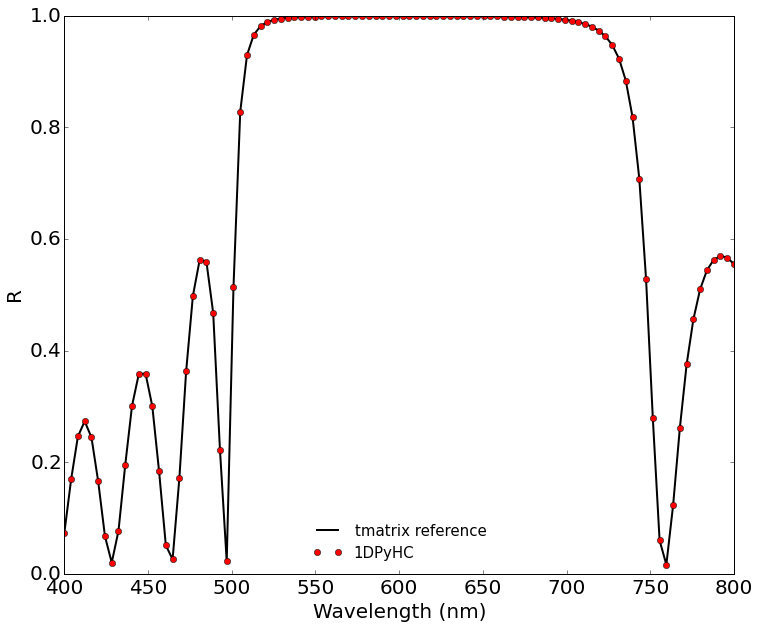

In [34]:
# result plot
plt.figure(figsize=(12,10))
plt.plot(v_wl_ref,v_R_ref,'k',
         v_wl,v_R,'ro',linewidth=2.0)

# ticks and labels
plt.xticks(fontsize=f_size)
plt.yticks(fontsize=f_size)
plt.xlabel("Wavelength (nm)", fontsize=f_size)
plt.ylabel("R", fontsize=f_size)

# legend
plt.legend(('tmatrix reference','1DPyHC'),frameon=False,fontsize=f_size-5,loc='lower center')